In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [5]:
data=pd.read_csv('/content/Crop_recommendation.csv')

In [ ]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
1692,117,86,48,28.695620,82.541958,6.225225,116.161684,banana
1693,114,94,53,26.335449,76.853201,6.190757,118.685826,banana
1694,110,78,50,25.937302,78.898644,5.915569,98.217475,banana
1695,94,70,48,25.136865,84.883944,6.195152,91.464425,banana
1696,80,71,47,27.505277,80.797840,6.156373,105.077699,banana


In [ ]:
data.shape

(1697, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1697 non-null   int64  
 1   P            1697 non-null   int64  
 2   K            1697 non-null   int64  
 3   temperature  1697 non-null   float64
 4   humidity     1697 non-null   float64
 5   ph           1697 non-null   float64
 6   rainfall     1697 non-null   float64
 7   label        1697 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 106.2+ KB


In [ ]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000
mean,52.647024,58.126105,52.031232,24.711674,65.848856,6.438962,99.364935
std,38.536964,34.164342,57.068796,4.910428,24.432640,0.870411,50.436396
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,5.314507
25%,21.000000,36.000000,19.000000,21.631491,51.278688,5.861399,66.838723
50%,37.000000,54.000000,27.000000,24.910323,77.906210,6.354007,93.123306
75%,90.000000,72.000000,52.000000,27.834871,83.856427,6.932537,115.356032
max,140.000000,145.000000,205.000000,41.948657,94.964199,9.935091,298.560117


from matplotlib import pyplot as plt
_df_24['N'].plot(kind='hist', bins=20, title='N')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['P'].plot(kind='hist', bins=20, title='P')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['K'].plot(kind='hist', bins=20, title='K')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['temperature'].plot(kind='hist', bins=20, title='temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='N', y='P', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='P', y='K', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30.plot(kind='scatter', x='K', y='temperature', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31.plot(kind='scatter', x='temperature', y='humidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32['N'].plot(kind='line', figsize=(8, 4), title='N')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_33['P'].plot(kind='line', figsize=(8, 4), title='P')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_34['K'].plot(kind='line', figsize=(8, 4), title='K')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_35['temperature'].plot(kind='line', figsize=(8, 4), title='temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
correlation=data.corr()

<ipython-input-10-7f2487af4b08>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data.corr()


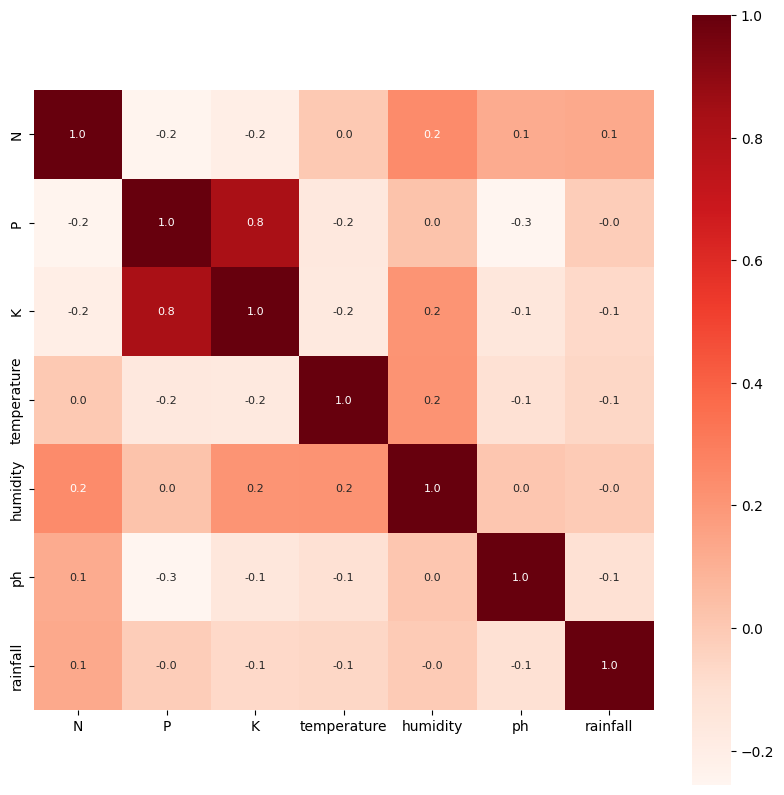

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cmap='Reds', cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8})
plt.show()

In [ ]:
data['label'].value_counts()

rice          139
Soyabeans     130
banana        130
beans         125
cowpeas       122
orange        122
maize         119
coffee        110
peas          100
groundnuts    100
mango         100
grapes        100
watermelon    100
apple         100
cotton        100
Name: label, dtype: int64

In [ ]:
print(correlation['rainfall'])


N              0.126947
P             -0.020124
K             -0.066860
temperature   -0.056895
humidity      -0.008299
ph            -0.104514
rainfall       1.000000
Name: rainfall, dtype: float64


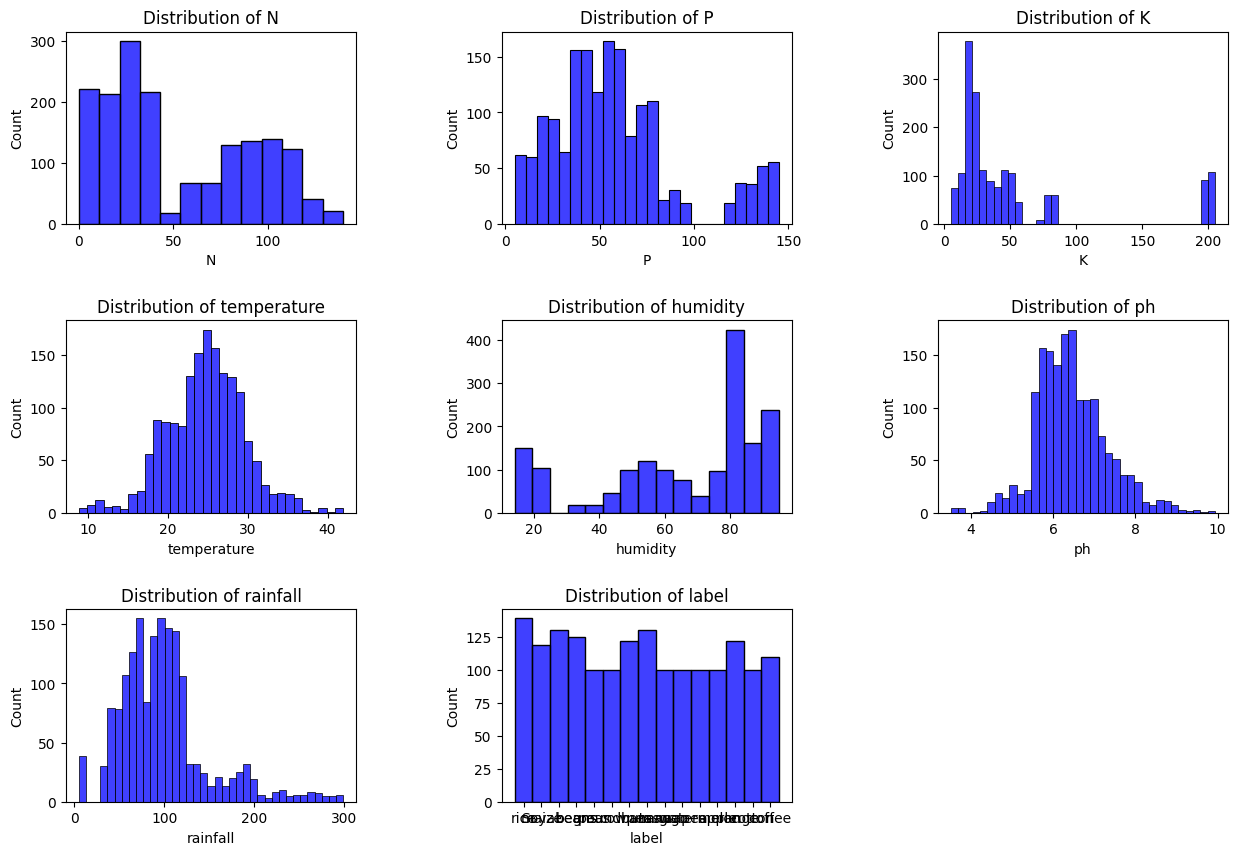

In [11]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

fig.subplots_adjust(hspace=0.5, wspace=0.5)

axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(data[feature], ax=axes[i], color='blue')
    axes[i].set_title(f'Distribution of {feature}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [12]:
X = data.drop(columns=['label'])  # Features
y = data['label']  # Target variable

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [16]:
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)


recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)


f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
 [[25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 23  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 22  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 22  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 16  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 23  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 18]]
